In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 20, 4

In [2]:
ds = xr.open_dataset('deployment0002_RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam_20160101T000000.587969-20160103T235959.566096.nc')

In [3]:
mean_bin_depths = np.mean(ds.bin_depths.values, axis=0)

In [4]:
def plot_one(data, times, mean_depths, diverge_cmap=False):
    # transpose and flip
    data = np.flipud(data.T)

    # determine plot bounds
    vmin = np.nanpercentile(data, 5)
    vmax = np.nanpercentile(data, 95)
    bothmax = max(abs(vmin), abs(vmax))
    
    yticks = np.arange(0, mean_depths.size, 4)
    ylabels = mean_depths[::-4].astype('int')
    
    xticks = np.arange(0, times.size, 40000)
    xlabels = [str(_)[:19].replace('T', '\n') for _ in times]
    
    # plot the data
    if diverge_cmap:
        plt.imshow(data, aspect='auto', vmin=-bothmax, vmax=bothmax, interpolation='nearest', cmap='RdBu')
    else:
        plt.imshow(data, aspect='auto', vmin=vmin, vmax=vmax, interpolation='nearest')
    ax = plt.gca()
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=60)

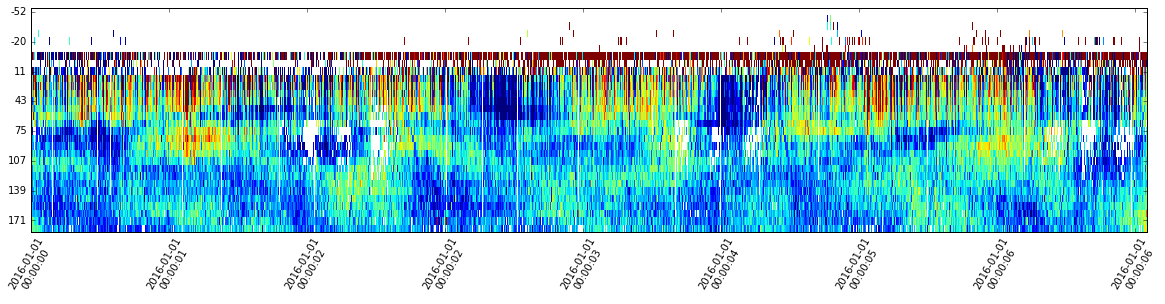

In [5]:
plot_one(ds.northward_seawater_velocity.values, ds.time.values, mean_bin_depths)

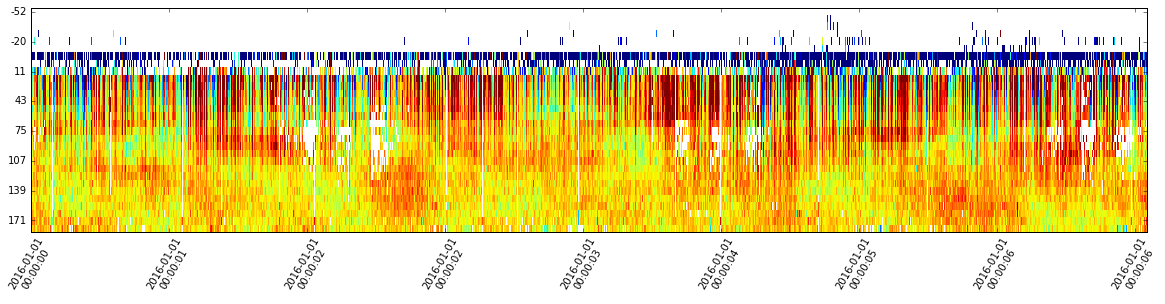

In [6]:
plot_one(ds.eastward_seawater_velocity.values, ds.time.values, mean_bin_depths)

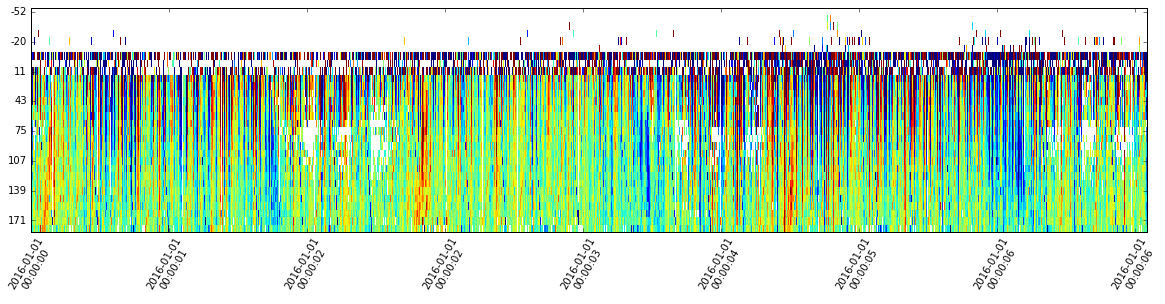

In [7]:
plot_one(ds.upward_seawater_velocity.values, ds.time.values, mean_bin_depths)

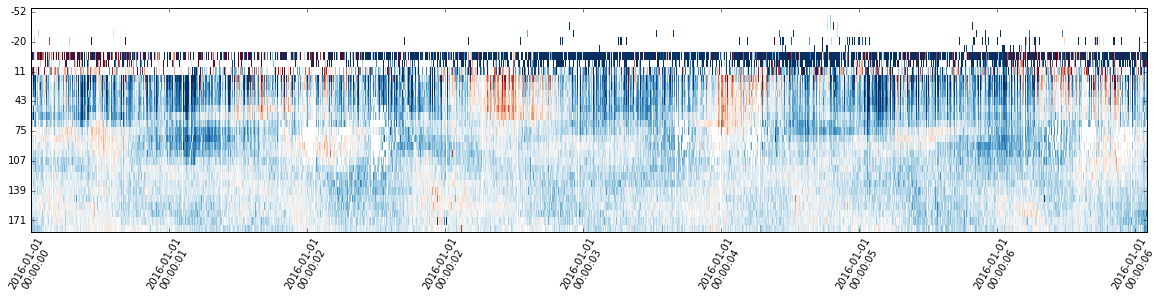

In [8]:
plot_one(ds.northward_seawater_velocity.values, ds.time.values, mean_bin_depths, True)

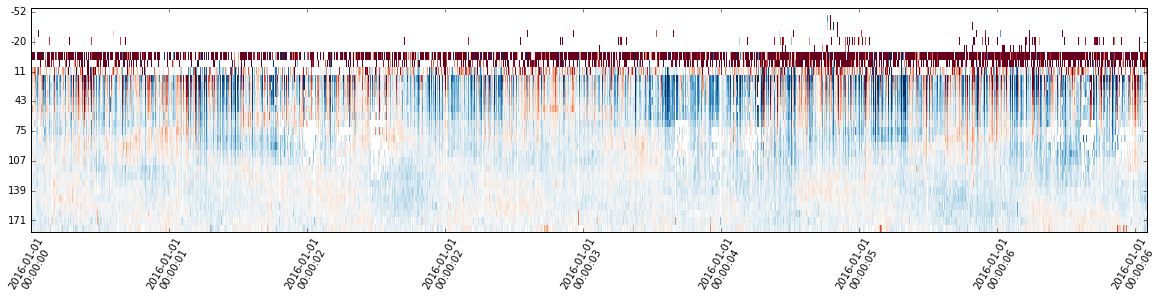

In [9]:
plot_one(ds.eastward_seawater_velocity.values, ds.time.values, mean_bin_depths, True)

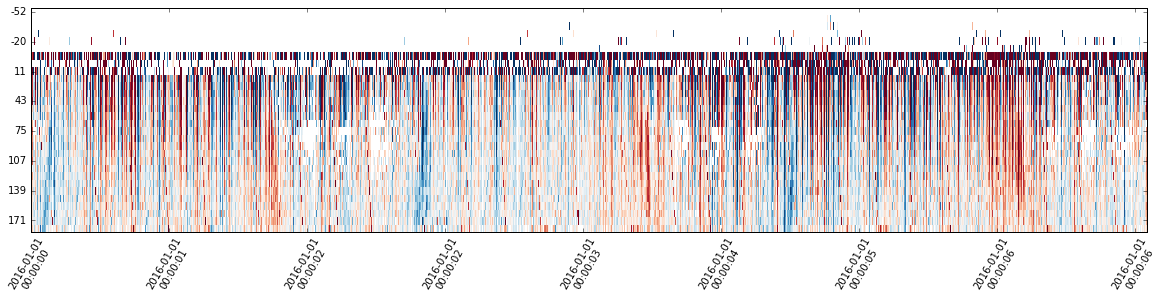

In [10]:
plot_one(ds.upward_seawater_velocity.values, ds.time.values, mean_bin_depths, True)